In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_csv("groceries - groceries.csv")

# Display the first few rows of the dataset
df.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculate the number of non-missing values in each transaction
num_non_missing_per_transaction = df.iloc[:, 1:33].count(axis=1)

# Extract the column containing the number of items in each transaction
num_items_per_transaction = df["Item(s)"]

# Check if the number of non-missing values in each transaction is the same as the number of items
is_complete_transaction = (num_non_missing_per_transaction == num_items_per_transaction)

# Count the number of rows where the number of items is not the same as the number of items in 'Item(s)' column
num_rows_with_missing_values = (~is_complete_transaction).sum()

# Print the number of rows with missing values or mismatches between the number of items and non-missing values
print("Number of Rows with Missing Values (Mismatch in Number of Items):", num_rows_with_missing_values)

Number of Rows with Missing Values (Mismatch in Number of Items): 0


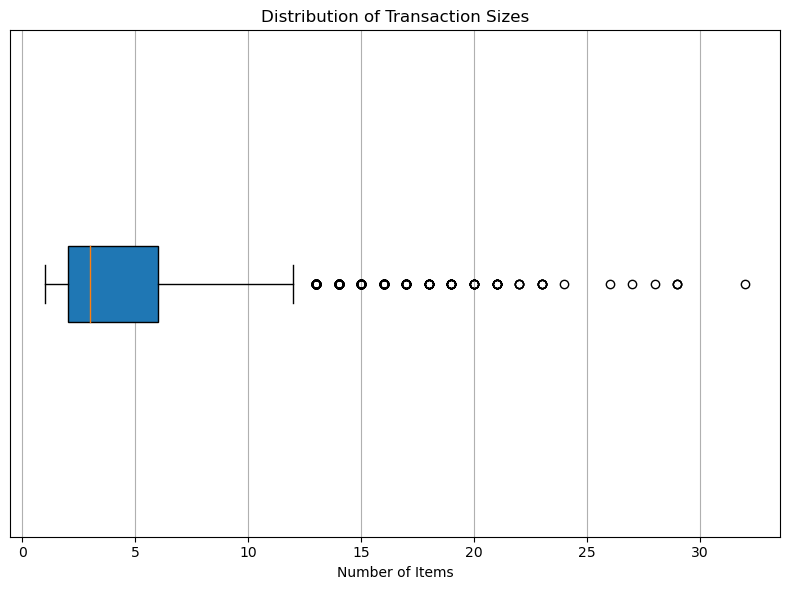

In [ ]:
# Create a box plot to visualize the distribution of transaction sizes and identify outliers
plt.figure(figsize=(8, 6))

# Use patch_artist=True to fill the box plot with colors
plt.boxplot(num_items_per_transaction, vert=False, patch_artist=True)

# Customize the plot for better presentation
plt.title("Distribution of Transaction Sizes")
plt.xlabel("Number of Items")
plt.grid(axis="x")  # Show grid lines on the x-axis for better readability
plt.yticks([])  # Remove the labels for the y-axis

plt.tight_layout()

# Show the plot
plt.show()

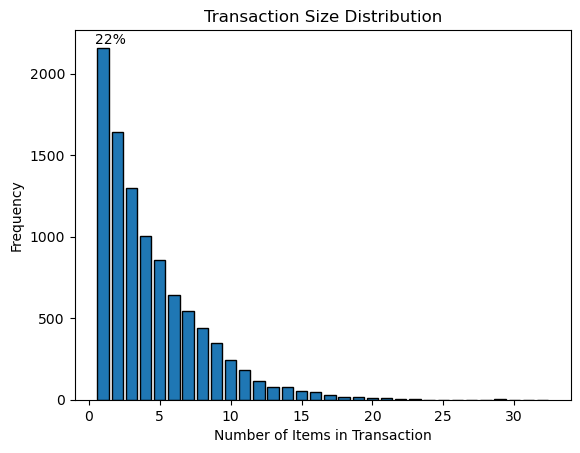

In [ ]:
# Calculate the maximum and minimum transaction sizes
min_size = min(num_items_per_transaction)
max_size = max(num_items_per_transaction)

# Create bins with a size of 1
bins = list(range(min_size, max_size + 2))

# Create histograms for transaction sizes
plt.hist(num_items_per_transaction, bins=bins, edgecolor="black", align="left", rwidth=0.8)
plt.title("Transaction Size Distribution")
plt.xlabel("Number of Items in Transaction")
plt.ylabel("Frequency")

# Calculate the percentage of each number of item in the "Item(s)" column
item_count = df["Item(s)"].value_counts()
total_transactions = len(df["Item(s)"])
percentage_item_purchases = (item_count / total_transactions) * 100

# Get the height (frequency) of the first bar
height_first_bar = plt.gca().patches[0].get_height()

# Set the label for the first bar with the percentage value
plt.annotate(f"{round(percentage_item_purchases[1])}%",
             xy=(bins[0] + 0.5, height_first_bar),
             xytext=(0, 3),
             textcoords="offset points",
             ha='center',
             fontsize=10)

plt.show()

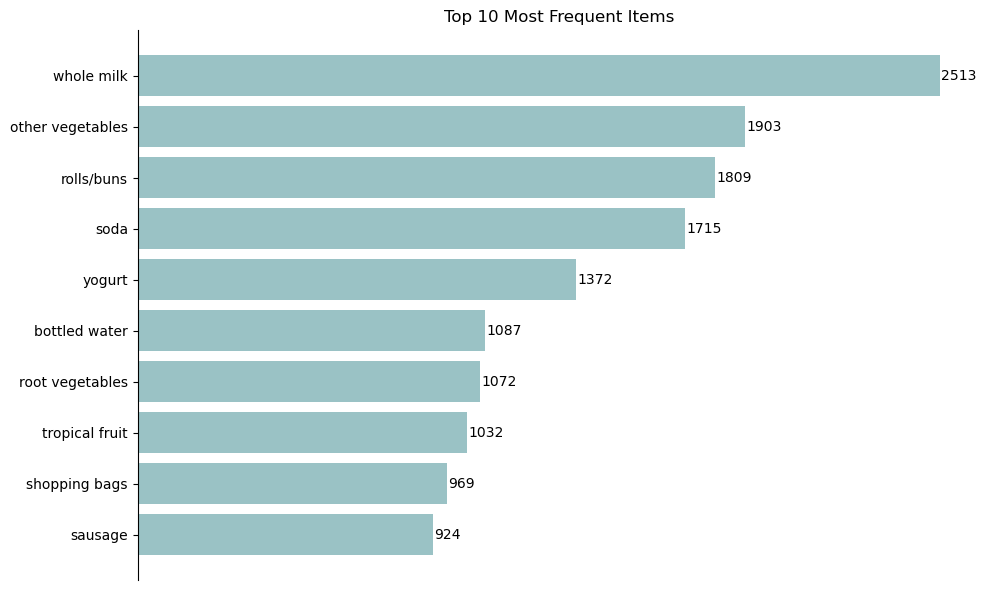

In [ ]:
# Calculate the frequency of each item in the DataFrame by stacking the columns and counting occurrences
item_counts = df.iloc[:, 1:].stack().value_counts()

# Sort items by frequency in descending order
sorted_items_desc = item_counts.sort_values(ascending=False)

# Select the top 10 most frequent items
top_10_items = sorted_items_desc.head(10)

# Create a horizontal bar plot for the top 10 most frequent items
plt.figure(figsize=(10, 6))

# Set the color for the bars
bar_color = "#9AC2C5"

# Plot the horizontal bar chart
bars = plt.barh(range(len(top_10_items)), top_10_items.values, color=bar_color)

# Set y-ticks and labels
plt.yticks(range(len(top_10_items)), top_10_items.index)

# Invert the y-axis
plt.gca().invert_yaxis()

# Remove right, top, and bottom borders
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

# Remove x-axis ticks and labels
plt.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# Add values beside the bars
for index, value in enumerate(top_10_items.values):
    plt.text(value + 5, index, str(value), ha="left", va="center")

# Remove grid
plt.grid(False)

# Remove y-axis label and x-axis title
plt.ylabel("")
plt.xlabel("")

# Set title
plt.title("Top 10 Most Frequent Items")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

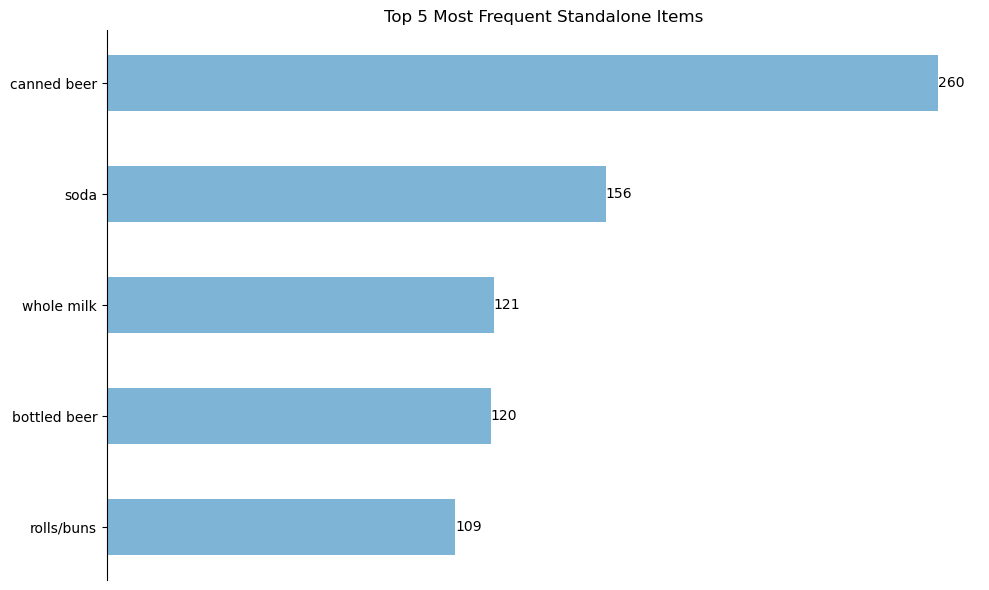

In [ ]:
# Extract the item columns
item_columns = df.columns[1:33]

# Create a new DataFrame to store the standalone purchases (transactions with only one item)
standalone_purchases = df[df["Item(s)"] == 1][item_columns]

# Item Frequency Analysis for Standalone Purchases
standalone_item_counts = standalone_purchases.stack().value_counts()
top_standalone_items = standalone_item_counts.head(5)  # Get the top 5 most frequent standalone items

# Create a horizontal bar plot for the top 5 most frequent standalone items
plt.figure(figsize=(10, 6))  # Set the figure size

# Set the color for the bars
bar_color = "#7EB5D6"

# Plot the horizontal bar chart with the specified color
plt.barh(top_standalone_items.index, top_standalone_items.values, color=bar_color, height=0.5)

# Remove y-axis label and x-axis title
plt.ylabel("")
plt.xlabel("")

plt.title("Top 5 Most Frequent Standalone Items")

# Add frequency values above each bar
for index, value in enumerate(top_standalone_items.values):
    plt.text(value, index, str(value), ha="left", va="center", color="black")

# Invert the y-axis to display items with the highest frequency on top
plt.gca().invert_yaxis()

# Remove x-axis ticks and labels
plt.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# Remove grid
plt.grid(False)

# Remove right and top spines for cleaner aesthetics
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Extract the item columns
item_columns = df.columns[1:33]

# Convert the data into a list of transactions
transactions = df[item_columns].apply(lambda row: row.dropna().tolist(), axis=1).tolist()

# Create a one-hot encoded DataFrame for the transactions
onehot_transactions = pd.DataFrame(transactions)

# Apply one-hot encoding
onehot_encoded = pd.get_dummies(onehot_transactions.unstack()).groupby(level=1).max()

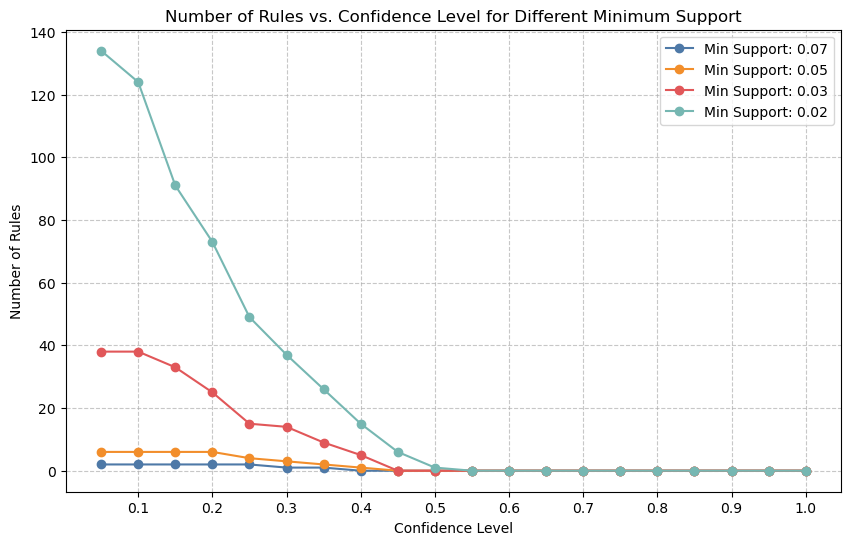

In [ ]:
# List of minimum support values
min_support_values = [0.07, 0.05, 0.03, 0.02]

# Confidence levels to evaluate
confidence_levels = list(np.arange(0.05, 1.05, 0.05))

# Empty lists to store results
num_rules_lists = []

# Calculate and store the number of rules for each combination of minimum support and confidence level
for min_support in min_support_values:
    frequent_itemsets = apriori(onehot_encoded, min_support=min_support, use_colnames=True)
    rules_list = []
    for confidence_level in confidence_levels:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
        num_rules = len(rules)
        rules_list.append(num_rules)
    num_rules_lists.append(rules_list)

# Plot the results
plt.figure(figsize=(10, 6))

colors = ["#4e79a7", "#f28e2b", "#e15759", "#76b7b2"]

for i, min_support in enumerate(min_support_values):
    plt.plot(confidence_levels, num_rules_lists[i], marker="o", color=colors[i], label=f"Min Support: {min_support}")

plt.xlabel("Confidence Level")
plt.ylabel("Number of Rules")
plt.title("Number of Rules vs. Confidence Level for Different Minimum Support")

# Set the desired x-axis labels
plt.xticks([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1])

# Add grid lines for better readability
plt.grid(True, linestyle="--", alpha=0.7)

plt.legend()
plt.show()

In [ ]:
# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Sort the association rules by 'lift' metric in descending order and reset the index
sorted_association_rules = association_rules_df.sort_values(by="lift", ascending=False).reset_index(drop=True)

# Display the sorted association rules DataFrame
print("\nAssociation Rules:")
sorted_association_rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900,0.700572
1,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320,0.622230
2,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
3,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565,0.559803
4,"(yogurt, whole milk)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511,0.543633
5,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577
6,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817,0.514659
7,(pork),(other vegetables),0.057651,0.193493,0.021657,0.375661,1.941476,0.010502,1.291779,0.514595
8,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,0.012517,1.461085,0.505984
9,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687,0.501524
